In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


#### 1) 데이터 전처리

In [12]:
from keras.datasets import mnist
from keras.utils import  np_utils
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import os
import sys
import tensorflow as tf

In [13]:
# seed 값 설정

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
# MNIST 데이터셋 불러오기

(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

In [5]:
print("학습셋 이미지 수 : %d개" %(X_train.shape[0]))
print("테스트셋 이미지 수 : %d개" %(X_test.shape[0]))

학습셋 이미지 수 : 60000개
테스트셋 이미지 수 : 10000개


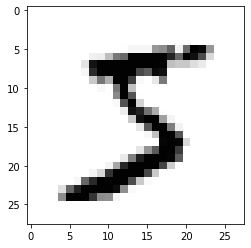

In [6]:
# 그래프로 확인

import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [7]:
# 코드로 확인

for x in X_train[0]:
  for i in x:
    sys.stdout.write("%d\t" %i)
  sys.stdout.write("\n")

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [8]:
# 차원변환과정 : 2차원 -> 1차원

X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [9]:
# 클래스 값 확인
print("class : %d" %(Y_class_train[0]))

class : 5


In [10]:
# 바이너리화 과정

Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

In [11]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### 2) 딥러닝 기본 프레임 만들기

In [20]:
# MNIST 데이터셋 불러오기

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')/255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [21]:
# 모델 프레임 설정

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [22]:
# 모델 실행 환경 설정

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
# 모델 최적화 설정

MODEL_DIR = '/content/gdrive/My Drive/deepLearning/modelCNN'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = '/content/gdrive/My Drive/deepLearning/modelCNN/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [24]:
# 모델의 실행

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.15318, saving model to /content/gdrive/My Drive/deepLearning/modelCNN/01-0.1532.hdf5

Epoch 00002: val_loss improved from 0.15318 to 0.10512, saving model to /content/gdrive/My Drive/deepLearning/modelCNN/02-0.1051.hdf5

Epoch 00003: val_loss improved from 0.10512 to 0.08050, saving model to /content/gdrive/My Drive/deepLearning/modelCNN/03-0.0805.hdf5

Epoch 00004: val_loss improved from 0.08050 to 0.07593, saving model to /content/gdrive/My Drive/deepLearning/modelCNN/04-0.0759.hdf5

Epoch 00005: val_loss improved from 0.07593 to 0.06870, saving model to /content/gdrive/My Drive/deepLearning/modelCNN/05-0.0687.hdf5

Epoch 00006: val_loss improved from 0.06870 to 0.06602, saving model to /content/gdrive/My Drive/deepLearning/modelCNN/06-0.0660.hdf5

Epoch 00007: val_loss improved from 0.06602 to 0.06084, saving model to /content/gdrive/My Drive/deepLearning/modelCNN/07-0.0608.hdf5

Epoch 00008: val_loss did not improve from 0.06084

Epoch 

In [25]:
# 테스트 정확도 출력

print("\n Test Accuracy : %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0690 - accuracy: 0.9816

 Test Accuracy : 0.9816


In [26]:
# 테스트셋의 오차

y_vloss = history.history['val_loss']

In [28]:
# 학습셋의 오차

y_loss = history.history['loss']

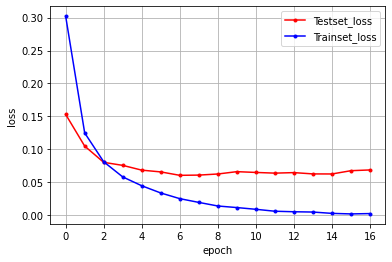

In [29]:
# 그래프로 표현

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label='Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')

# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#### 3) 컨볼루션 신경망 적용

In [8]:
from keras.datasets import mnist
from keras.utils import np_utils
from  keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

In [9]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

In [10]:
# 데이터 불러오기

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [11]:
# 컨볼루션 신경망의 설정

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
# 모델 최적화 설정

MODEL_DIR = '/content/gdrive/My Drive/deepLearning/modelCNN'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="/content/gdrive/My Drive/deepLearning/modelCNN/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [13]:
# 모델의 실행

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.05747, saving model to /content/gdrive/My Drive/deepLearning/modelCNN/01-0.0575.hdf5

Epoch 00002: val_loss improved from 0.05747 to 0.04068, saving model to /content/gdrive/My Drive/deepLearning/modelCNN/02-0.0407.hdf5

Epoch 00003: val_loss improved from 0.04068 to 0.03452, saving model to /content/gdrive/My Drive/deepLearning/modelCNN/03-0.0345.hdf5

Epoch 00004: val_loss improved from 0.03452 to 0.03026, saving model to /content/gdrive/My Drive/deepLearning/modelCNN/04-0.0303.hdf5

Epoch 00005: val_loss improved from 0.03026 to 0.02622, saving model to /content/gdrive/My Drive/deepLearning/modelCNN/05-0.0262.hdf5

Epoch 00006: val_loss did not improve from 0.02622

Epoch 00007: val_loss improved from 0.02622 to 0.02480, saving model to /content/gdrive/My Drive/deepLearning/modelCNN/07-0.0248.hdf5

Epoch 00008: val_loss did not improve from 0.02480

Epoch 00009: val_loss did not improve from 0.02480

Epoch 00010: val_loss did not improve

In [14]:
# 테스트 정확도 출력

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0301 - accuracy: 0.9920

 Test Accuracy: 0.9920


In [15]:
# 테스트 셋의 오차

y_vloss = history.history['val_loss']

In [16]:
# 학습셋의 오차

y_loss = history.history['loss']

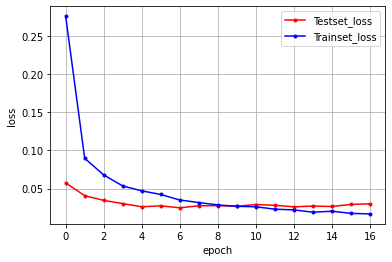

In [17]:
# 그래프로 표현

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()